In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/housing.csv')

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
import seaborn as sns

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# this initializes the algorithm
lreg = LinearRegression()

In [14]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X = df[['LSTAT', 'RM']]
y = df['PRICE']

In [19]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lreg.coef_

array([-0.64235833,  5.09478798])

In [21]:
lreg.intercept_

-1.3582728118744676

In [23]:
df['PREDICTION'] = lreg.predict(X)

In [28]:
np.sum(df[['LSTAT', 'RM']].head(1)*lreg.coef_, axis=1) + lreg.intercept_

0    28.941014
dtype: float64

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,28.941014
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.484206
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.659075
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.406520
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.630407


In [29]:
lreg.score(X, y)

0.6385616062603403

In [40]:
cols = np.abs(df.drop('PREDICTION', axis=1).corr())['PRICE'].sort_values(ascending=False)[1:6].index.tolist()

In [41]:
X = df[cols]
y = df['PRICE']

In [42]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
coeff_dict = {'Columns': X.columns, 'Coeff': lreg.coef_}

coeffs = pd.DataFrame(coeff_dict)

In [45]:
coeffs.sort_values(by='Coeff', ascending=False)

,Columns,Coeff
1,RM,4.625169
3,INDUS,0.056975
4,TAX,-0.003537
0,LSTAT,-0.559005
2,PTRATIO,-0.876154


In [46]:
X.head()

,LSTAT,RM,PTRATIO,INDUS,TAX
0,4.98,6.575,15.3,2.31,296
1,9.14,6.421,17.8,7.07,242
2,4.03,7.185,17.8,7.07,242
3,2.94,6.998,18.7,2.18,222
4,5.33,7.147,18.7,2.18,222


In [47]:
df['TAX'].max()

711

In [48]:
df['TAX'].min()

187

In [49]:
X.mean()

LSTAT       12.653063
RM           6.284634
PTRATIO     18.455534
INDUS       11.136779
TAX        408.237154
dtype: float64

In [50]:
X = X - X.mean()

In [54]:
X = X / X.std()

In [51]:
X.mean()

LSTAT     -3.565001e-15
RM        -8.999389e-15
PTRATIO   -2.348582e-14
INDUS     -2.800395e-14
TAX        3.370163e-13
dtype: float64

In [55]:
X.std()

LSTAT      1.0
RM         1.0
PTRATIO    1.0
INDUS      1.0
TAX        1.0
dtype: float64

In [56]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
coeff_dict = {'Columns': X.columns, 'Coeff': lreg.coef_}

coeffs = pd.DataFrame(coeff_dict)

In [58]:
coeffs

,Columns,Coeff
0,LSTAT,-3.991887
1,RM,3.249723
2,PTRATIO,-1.896826
3,INDUS,0.390870
4,TAX,-0.596104


In [59]:
df.h

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,28.941014
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.484206
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.659075
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.406520
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.630407


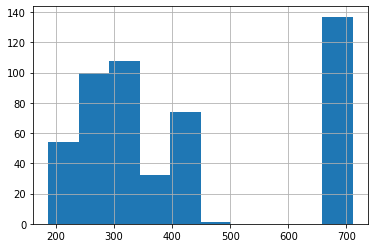

In [60]:
df['TAX'].hist()

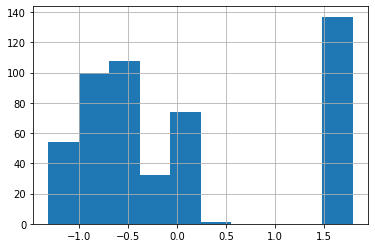

In [61]:
X['TAX'].hist()

In [62]:
lreg.score(X, y)

0.6804097741290724

In [63]:
lreg.score(df[cols], y)

-1248.474478466087

In [64]:
from sklearn.linear_model import Lasso

In [65]:
lasso = Lasso()

In [66]:
lasso.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
lasso.coef_

array([-3.62698295,  2.68460445, -1.35715355, -0.        , -0.        ])

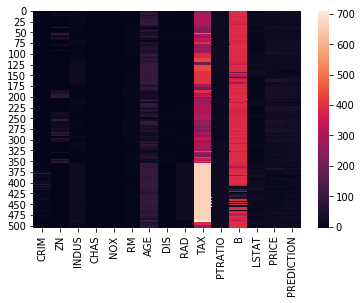

In [68]:
sns.heatmap(df)

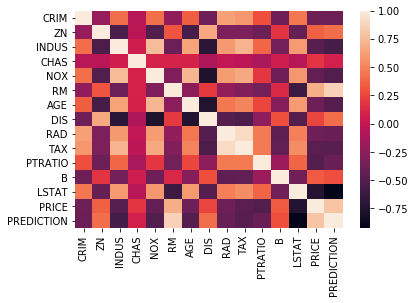

In [71]:
sns.heatmap(df.corr());

In [72]:
lasso.alpha

1.0